In [1]:
import numpy as np
import pandas as pd
import bson
import seaborn as sns
import string
import re
from unidecode import unidecode
import itertools
import cleantext
import nltk
import unicodedata
import unidecode
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!ls ../data

X_clean             details.csv         jeux.csv
avis.csv            infos_scrapping.csv y


## data selection

In [6]:
avis_df = pd.read_csv('../data/avis.csv')

In [7]:
avis_df.head(3)

,Unnamed: 0,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...
2,2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."


In [8]:
avis_df.shape

(246524, 11)

In [9]:
avis_df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [10]:
for column in avis_df.columns:
    print(column)

_id
author
date_published
title_review
note
review_href
title
url
treated
comment


In [11]:
avis_df_treated = avis_df.dropna(inplace=False)

In [12]:
X, y = avis_df_treated.drop(['note'], axis=1), avis_df_treated['note']

In [5]:
#X['comment'] = X['comment'].apply(unidecode.unidecode)

In [102]:
X.to_csv('../data/X_clean', index=False)

In [103]:
y.to_csv('../data/y', index=False)

## Chargement df traités

In [13]:
X = pd.read_csv('../data/X_clean')

In [14]:
y = pd.read_csv('../data/y')

## Creation du train/test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## exploration des données des notes

<AxesSubplot: >

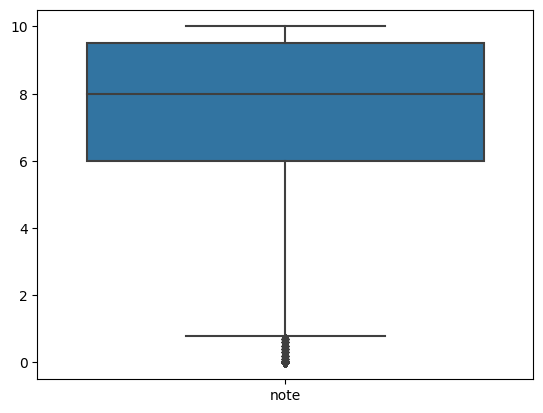

In [8]:
sns.boxplot(data=pd.DataFrame(y_train))

<AxesSubplot: xlabel='note', ylabel='Count'>

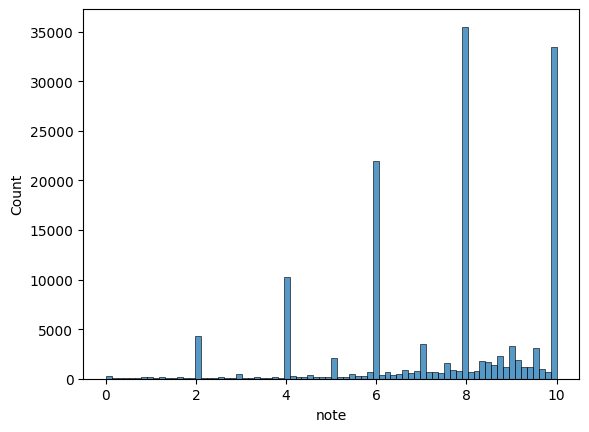

In [9]:
sns.histplot(data=pd.DataFrame(y_train), x='note')

## data processing manuel

In [10]:
X_train['comment']

6771      Petit coup de coeur sur ce jeu d'enquêtes qui ...
107366    Les + :Règles simplesMatériel très correctPart...
165317    des jeux comme ça faut plus en créer ou alors ...
38114     Un jeu rapide, rigolo et relativement simple a...
132460    Enfin, pas tout à fait une invention, mais plu...
                                ...                        
119879    Space Alert est vraiment une réussite.Je ne su...
103694    Si on connait Sokoban, on n'est pas dépaysé : ...
131932    Un très bon jeu d'optimisation et de placement...
146867    Gheos est un jeu de tuiles qui se veut matheux...
121958    Ad elta est un jeu islandais simple et familia...
Name: comment, Length: 149594, dtype: object

### On commence par retirer les whitespaces

### on recupere le df sur lequel on a deja retire les accents

In [18]:
stopwords = stopwords.words('french')

In [19]:
def reg_length(x):
    try:
        return re.sub(r'\b\w{1,3}\b', '', x)
    except:
        return x

In [20]:
def reg_spaces(x):
    try: 
        return re.sub(' +', ' ', x)
    except:
        return x

In [21]:
def reg_nb(x):
    try:
        return re.sub('\d', ' ', x)
    except:
        return x

In [22]:
def stopwords_processing(x):
    try:
        split = x.split()
        words = [word for word in split if word not in stopwords]
        return " ".join(words)
    except Exception as e:
        print(e)
        return x

In [23]:
def preprocess(df):
    # on retire les articles comme :d'
    r = df.str.replace("'", ' ')
    r = df.str.lower()
    
    # retrait de ponctuation
    punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for el in punc:
        r = r.str.replace(el, ' ')
    
    # on retire les nombre
    r = r.apply(reg_nb)    
    # regex pour retirer tous les mots dont length <= 3
    r = r.apply(reg_length)
    # on retire les extra spaces
    r = r.apply(reg_spaces)
    
    # on retire les mots stopwords français
    r = r.apply(stopwords_processing)
    return r

In [24]:
X['comment']

0         Lorsque le jeu est jeu, bon, réflexif, joli po...
1         Comment continuer après un mega hit ? Simpleme...
2         Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...
3         Très joli bijou que ce jeu-là ! Le matériel, l...
4         Mariposas est plutôt beau avec un grand platea...
                                ...                        
186988    Un jeu attrayant : il semble facile à jouer ca...
186989    Bon alors comment dire... on a joué a 6 et c'e...
186990    Jeu indéniablement sympa, très visuel lorsque ...
186991    Cosmic Wimpout est né dans les années 70 sur l...
186992    Enorme jeu de bluff dans la ligné de Perudo av...
Name: comment, Length: 186993, dtype: object

In [25]:
X['comment'] = preprocess(X['comment'])

/var/folders/bj/nxnqlv413xx4lwrjzkz8s9lm0000gn/T/ipykernel_68052/3496991787.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  r = r.str.replace(el, ' ')


In [27]:
# on retire la ponctuation
X['comment'] = X['comment'].apply(unidecode.unidecode)

In [28]:
X['comment']

0         lorsque reflexif joli sensible style illustrat...
1         comment continuer apres mega simplement apres ...
2         mariposas elizabeth hargrave parvient << simul...
3         tres joli bijou materiel illustrations histoir...
4         mariposas plutot beau grand plateau petits pap...
                                ...                        
186988    attrayant semble facile jouer complexe premier...
186989    alors comment dire joue limite soporifique jus...
186990    indeniablement sympa tres visuel lorsque zombi...
186991    cosmic wimpout annees campus americains petit ...
186992    enorme bluff ligne perudo petites variantes ex...
Name: comment, Length: 186993, dtype: object

In [29]:
X.to_csv('../data/X_processed', index=False)

### on etudie quels sont les mots les plus populaires

In [30]:
X_processed = X['comment'].astype('string')

In [31]:
words = ' '.join([i for i in X_processed]).split()

In [32]:
counter_words = Counter(words)

In [33]:
len(counter_words)

128952

In [44]:
counter_words.most_common(20)

[('plus', 171697),
 ('tres', 134638),
 ('bien', 122892),
 ('tout', 105870),
 ('cartes', 89527),
 ('joueurs', 73560),
 ('partie', 70543),
 ('fait', 68824),
 ('peut', 67644),
 ('faire', 59589),
 ('parties', 58393),
 ('etre', 57774),
 ('jouer', 57705),
 ("'", 51875),
 ('jeux', 50933),
 ('regles', 50800),
 ('sans', 46341),
 ('comme', 46023),
 ('trop', 45228),
 ('donc', 42995)]

In [35]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(counter_words)

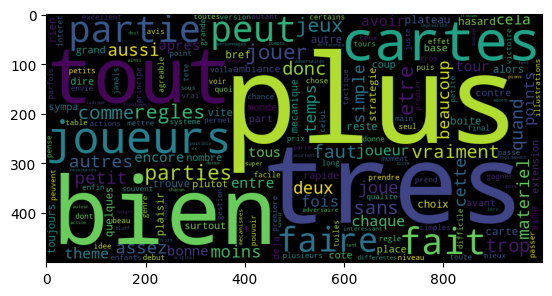

In [36]:
plt.imshow(wordcloud)

Les mots les plus frequents ne semblent pas être très pertinents pour qualifier la critique de positive ou négative, il faut des mots plus précis et spécifiques

en revanche, on retrouve quand même certains mots d'intensite/de degré eleve (eg superlatifs) "plus, tres, trop, tout"

## commentaires

Les stopwords n'ont pas de définition formelle et peuvent varier selon l'objectif du traitement de texte. De manière générale, ce sont les mots qui sont retirés car ils sont trop communs et n'apportent pas de valeur à l'analyse du texte.

## Définition/explication du Stemming et de la Lemmatization

## Stemming 

 Consiste à retirer le suffixe des mots pour que tous les mots qui dérivent de cette racine soient traités comme équivalents.

#### Cf. Algorithme de Porter:
 basé sur les mots anglais donc son application est limitée à cette langue. <br> l'algorithme considère qu'un mot ne peut être que d'une forme parmi 4, qui sont des suites de consonnes et de voyelles <br> des règles sont explicites sont définies autour de cette composition, par ex: ing -> vide

#### l'algorithme a ces inconvénients: over/under stemming <br> 

overstemming: considerent des mots de sens differents comme equivalents: eg universe et university <br> understemming: ne traite pas des mots comme equivalents: eg alumni et alumnae

Les stems deviennent donc parfois non pertinents. Ne fait pas la différence entre les verbes, les noms. 

### Snowball stemmer

Plus aggressif que Porter Stemmer <br> le plus utilise en pratique <br> amélioration générale

## Lemmatization

Regroupe des mots dérivés comme le Stemming <br> sauf que le contexte est pris en considération <br> les arguments de position sont considérés, comme par exemple si le mot est un adjectif, nom, verbe

Coûteux en ressource informatique car il utilise des tables de correspondance (liste association de valeurs)